In [85]:
import matplotlib.pyplot as plt
from astropy.table import Table, join  
import numpy as np
import collections
import numpy.ma as ma 
import brewer2mpl
from scipy.interpolate import interp1d 

%matplotlib inline

In [59]:
dr7dat = Table.read('/data/sdss/DR7/dr7qso.fit') 
print len(dr7dat[dr7dat['IMAG'] < 19.1])

63855


In [72]:
# Main DR7Q
dr7dat = Table.read('/data/sdss/DR7/dr7qso.fit')

# Shen catalog
shendat = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')

dr7dat['UMAG_DERED_SHEN'] = shendat['UGRIZ_DERED'][:,0]
dr7dat['GMAG_DERED_SHEN'] = shendat['UGRIZ_DERED'][:,1]
dr7dat['RMAG_DERED_SHEN'] = shendat['UGRIZ_DERED'][:,2]
dr7dat['IMAG_DERED_SHEN'] = shendat['UGRIZ_DERED'][:,3]
dr7dat['ZMAG_DERED_SHEN'] = shendat['UGRIZ_DERED'][:,4]
dr7dat['LOGLBOL'] = shendat['LOGLBOL']

# Calculate extinction
with open('/home/lc585/Dropbox/IoA/QSOSED/Model/extcur/gal3ext.sph') as f:
    exttmp = Table.read(f,format='ascii')
    
ext = interp1d(exttmp['col1'],exttmp['col2'])

dr7dat['UMAG_DERED'] = np.zeros(len(dr7dat))
dr7dat['GMAG_DERED'] = np.zeros(len(dr7dat)) 
dr7dat['RMAG_DERED'] = np.zeros(len(dr7dat)) 
dr7dat['IMAG_DERED'] = np.zeros(len(dr7dat)) 
dr7dat['ZMAG_DERED'] = np.zeros(len(dr7dat)) 

for i,row in enumerate(dr7dat):
    
    ebv = row['AU'] / (ext(3546.0) + 3.1)
    
    row['UMAG_DERED'] = row['UMAG'] - ebv * ( ext(3546.0) + 3.1 ) 
    row['GMAG_DERED'] = row['GMAG'] - ebv * ( ext(4670.0) + 3.1 )  
    row['RMAG_DERED'] = row['RMAG'] - ebv * ( ext(6156.0) + 3.1 )  
    row['IMAG_DERED'] = row['IMAG'] - ebv * ( ext(7471.0) + 3.1 ) 
    row['ZMAG_DERED'] = row['ZMAG'] - ebv * ( ext(8918.0) + 3.1 )  

# ULAS dat
ulasdat = np.genfromtxt('/data/mbanerji/Projects/QSO/DR7QSO/DR7QSO_ULASDR9_ABmags.cat')
ulasbestid = np.genfromtxt('/data/mbanerji/Projects/QSO/DR7QSO/DR7QSO_ULASDR9_ABmags.cat',usecols=1,dtype='str')

ulastab = Table()
ulastab['BESTID'] = ulasbestid 
ulastab['UKIDSS_YMAG'] = ulasdat[:,9] 
ulastab['UKIDSS_JMAG'] = ulasdat[:,10] 
ulastab['UKIDSS_HMAG'] = ulasdat[:,11] 
ulastab['UKIDSS_KMAG'] = ulasdat[:,12] 
ulastab['UKIDSS_YMAG_ERR'] = ulasdat[:,18] 
ulastab['UKIDSS_JMAG_ERR'] = ulasdat[:,19] 
ulastab['UKIDSS_HMAG_ERR'] = ulasdat[:,20] 
ulastab['UKIDSS_KMAG_ERR'] = ulasdat[:,21] 
ulastab['UKIDSS_YSNR'] = 1.0 / (ulasdat[:,18] * 0.4 * np.log(10) )
ulastab['UKIDSS_JSNR'] = 1.0 / (ulasdat[:,19] * 0.4 * np.log(10) )
ulastab['UKIDSS_HSNR'] = 1.0 / (ulasdat[:,20] * 0.4 * np.log(10) ) 
ulastab['UKIDSS_KSNR'] = 1.0 / (ulasdat[:,21] * 0.4 * np.log(10) )

newtable1 = join(dr7dat, ulastab, join_type='left', keys='BESTID')

newtab = Table()
newtab['UKIDSS_YMAG_DERED'] = np.zeros(len(newtable1)) 
newtab['UKIDSS_JMAG_DERED'] = np.zeros(len(newtable1)) 
newtab['UKIDSS_HMAG_DERED'] = np.zeros(len(newtable1)) 
newtab['UKIDSS_KMAG_DERED'] = np.zeros(len(newtable1)) 

for i in range(len(newtable1)):
    
    ebv = newtable1['AU'][i] / (ext(3546.0) + 3.1)
    
    newtab['UKIDSS_YMAG_DERED'][i] = newtable1['UKIDSS_YMAG'][i] - ebv * ( ext(10305.0) + 3.1 )  
    newtab['UKIDSS_JMAG_DERED'][i] = newtable1['UKIDSS_JMAG'][i] - ebv * ( ext(12483.0) + 3.1 )  
    newtab['UKIDSS_HMAG_DERED'][i] = newtable1['UKIDSS_HMAG'][i] - ebv * ( ext(16313.0) + 3.1 )  
    newtab['UKIDSS_KMAG_DERED'][i] = newtable1['UKIDSS_KMAG'][i] - ebv * ( ext(22010.0) + 3.1 )  

newtable1['UKIDSS_YMAG_DERED'] = newtab['UKIDSS_YMAG_DERED']
newtable1['UKIDSS_JMAG_DERED'] = newtab['UKIDSS_JMAG_DERED']
newtable1['UKIDSS_HMAG_DERED'] = newtab['UKIDSS_HMAG_DERED']
newtable1['UKIDSS_KMAG_DERED'] = newtab['UKIDSS_KMAG_DERED']

# Manda matched DR7Q to ALLWISE 
wisedat = Table.read('/data/sdss/DR7/AllWISE/DR7QSO_AllWISE_matched.fits')

wisetab = Table()
wisetab['SDSSJ'] = wisedat['SDSSJ']
wisetab['BESTID'] = wisedat['BESTID']
wisetab['ALLWISE_RA'] = wisedat['ALLWISE_RA']
wisetab['ALLWISE_DEC'] = wisedat['ALLWISE_DEC']
wisetab['W1MPRO_ALLWISE'] = wisedat['W1MPRO_ALLWISE']
wisetab['W1SIGMPRO_ALLWISE'] = wisedat['W1SIGMPRO_ALLWISE']
wisetab['W1SNR_ALLWISE'] = wisedat['W1SNR_ALLWISE']
wisetab['W2MPRO_ALLWISE'] = wisedat['W2MPRO_ALLWISE']
wisetab['W2SIGMPRO_ALLWISE'] = wisedat['W2SIGMPRO_ALLWISE']
wisetab['W2SNR_ALLWISE'] = wisedat['W2SNR_ALLWISE']
wisetab['W3MPRO_ALLWISE'] = wisedat['W3MPRO_ALLWISE']
wisetab['W3SIGMPRO_ALLWISE'] = wisedat['W3SIGMPRO_ALLWISE']
wisetab['W3SNR_ALLWISE'] = wisedat['W3SNR_ALLWISE']
wisetab['W4MPRO_ALLWISE'] = wisedat['W4MPRO_ALLWISE']
wisetab['W4SIGMPRO_ALLWISE'] = wisedat['W4SIGMPRO_ALLWISE']
wisetab['W4SNR_ALLWISE'] = wisedat['W4SNR_ALLWISE']

newtable2 = join(newtable1, wisetab, join_type='left', keys='SDSSJ')

duplicates = [x for x, y in collections.Counter(newtable2['SDSSJ']).items() if y > 1]
inds = np.where( (newtable2['SDSSJ'] <> duplicates[0])  & (newtable2['SDSSJ'] <> duplicates[1]) )[0]

newtable2 = Table(newtable2[inds])

# Other properties of quasars 
# SpecObjID
# Object Name (made up from the ra and dec of the object)
# redshift (improved from the Hewett & Wild 2010 scheme)
# redshift error
# FIRST radio-detection code (-1=not detected; 0=not in FIRST footprint; 1=FIRST-detected)
# BAL quasar code (0=not a BAL; 1=BAL - mostly from Allen et al. 2011) 

qsotab = Table()
qsotab['SPECOID'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=0,dtype='str')
qsotab['OBJNAME'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=1,dtype='str')
qsotab['Z_HEWETT'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=2)
qsotab['Z_HEWETT_ERR'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=3)
qsotab['FIRST_FLG'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=4,dtype='int')
qsotab['BALFLG'] = np.genfromtxt('/data/vault/phewett/DR7/liam_f01.lis',usecols=5,dtype='int')

newtable3 = join(newtable2, qsotab, join_type='left', keys='SPECOID')


In [94]:
# How many cross-matched 
t = newtable3[~newtable3['UKIDSS_YMAG'].mask]
t = t[t['IMAG'] < 19.1]

# No magnitudes
bad = (t['UKIDSS_YMAG'] < 0.0) & (t['UKIDSS_JMAG'] < 0.0) & (t['UKIDSS_HMAG'] < 0.0) & (t['UKIDSS_KMAG'] < 0.0)
t = t[~bad]

print len(t)
t = t[~t['W1MPRO_ALLWISE'].mask]
print len(t)

# t = t[t['BALFLG' != 1]]

t = t[t['BALFLG'] != 1]

print len(t)


t.write('/data/lc585/SDSS/matched_catalogue.fits')

20954
20665
19853


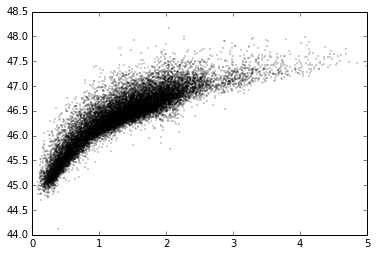

In [93]:
fig, ax = plt.subplots()
t = t[t['LOGLBOL'] > 20]

ax.plot(t['Z_HEWETT'], 
        t['LOGLBOL'], 
        linestyle='', 
        marker='o',
        markersize=1,
        markerfacecolor='black',
        markeredgecolor='None')

In [31]:
shendat = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')

t1 = Table()
t1['SDSSJ'] = shendat['SDSS_NAME']
t1['IMAG_SHEN'] = shendat['UGRIZ'][:, 3]
t1['LOGLBOL_SHEN'] = shendat['LOGLBOL']

dr7dat = Table.read('/data/sdss/DR7/dr7qso.fit')

dr7dat = join(dr7dat, t1, join_type='left', keys='SDSSJ')

ulasdat = np.genfromtxt('/data/mbanerji/Projects/QSO/DR7QSO/DR7QSO_ULASDR9_ABmags.cat')
ulasbestid = np.genfromtxt('/data/mbanerji/Projects/QSO/DR7QSO/DR7QSO_ULASDR9_ABmags.cat',usecols=1,dtype='str')

ulastab = Table()
ulastab['BESTID'] = ulasbestid 
ulastab['UKIDSS_YMAG'] = ulasdat[:,9] 
ulastab['UKIDSS_JMAG'] = ulasdat[:,10] 
ulastab['UKIDSS_HMAG'] = ulasdat[:,11] 
ulastab['UKIDSS_KMAG'] = ulasdat[:,12] 
ulastab['UKIDSS_YMAG_ERR'] = ulasdat[:,18] 
ulastab['UKIDSS_JMAG_ERR'] = ulasdat[:,19] 
ulastab['UKIDSS_HMAG_ERR'] = ulasdat[:,20] 
ulastab['UKIDSS_KMAG_ERR'] = ulasdat[:,21] 
ulastab['UKIDSS_YSNR'] = 1.0 / (ulasdat[:,18] * 0.4 * np.log(10) )
ulastab['UKIDSS_JSNR'] = 1.0 / (ulasdat[:,19] * 0.4 * np.log(10) )
ulastab['UKIDSS_HSNR'] = 1.0 / (ulasdat[:,20] * 0.4 * np.log(10) ) 
ulastab['UKIDSS_KSNR'] = 1.0 / (ulasdat[:,21] * 0.4 * np.log(10) )

dr7dat = join(dr7dat, ulastab, join_type='left', keys='BESTID')



In [50]:
t = dr7dat[~dr7dat['UKIDSS_YMAG'].mask]
bad = (t['UKIDSS_YMAG'] < 0.0) & (t['UKIDSS_JMAG'] < 0.0) & (t['UKIDSS_HMAG'] < 0.0) & (t['UKIDSS_KMAG'] < 0.0)





(array([13658, 21566, 24336, 24357, 36281]),)


In [55]:
# Main DR7Q
dr7dat = Table.read('/data/sdss/DR7/dr7qso.fit')

# Shen catalog
shendat = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')

for i in range(len(dr7dat)):
    if dr7dat['SDSSJ'][i] != shendat['SDSS_NAME'][i]:
        print i, dr7dat['SDSSJ'][i]